# Logistic regression model using title data vectorized with TF-IDF

In [1]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [2]:
#import data

%store -r x_title_train_tf
%store -r x_title_test_tf
%store -r y_title_train_tf
%store -r y_title_test_tf

In [3]:
#rename variables for ease of use

x_train = x_title_train_tf
x_test = x_title_test_tf
y_train = y_title_train_tf
y_test = y_title_test_tf

In [4]:
#define model

lr = LogisticRegression()

In [5]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [6]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [7]:
#cross validate on training set to check model stability

cv_scores_tfidf_title_lr = cross_validate(lr, x_train, y_train, cv = k_folds, scoring=scorer)

In [8]:
#check cross validation scores

cv_scores_tfidf_title_lr

{'fit_time': array([0.28822947, 0.17752671, 0.24634099, 0.28224421, 0.18055081]),
 'score_time': array([0.01595712, 0.01097012, 0.01097059, 0.01097345, 0.0169487 ]),
 'test_accuracy': array([0.88058063, 0.884606  , 0.87983409, 0.87434427, 0.88300598]),
 'test_precision': array([0.87388393, 0.87619584, 0.86975964, 0.86783528, 0.87240022]),
 'test_recall': array([0.85597158, 0.86022099, 0.85706417, 0.84893849, 0.86007204]),
 'test_f1_score': array([0.86483501, 0.86813493, 0.86336524, 0.85828288, 0.86619227])}

In [9]:
#fit model on the whole training set
start = process_time()

lr.fit(x_train, y_train)

end=process_time()

In [10]:
#test model on test set

y_pred = lr.predict(x_test)

In [11]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      9912
           1       0.86      0.87      0.87      7655

    accuracy                           0.88     17567
   macro avg       0.88      0.88      0.88     17567
weighted avg       0.88      0.88      0.88     17567



In [12]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'Logistic Regression model with Title Data (TF-IDF)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

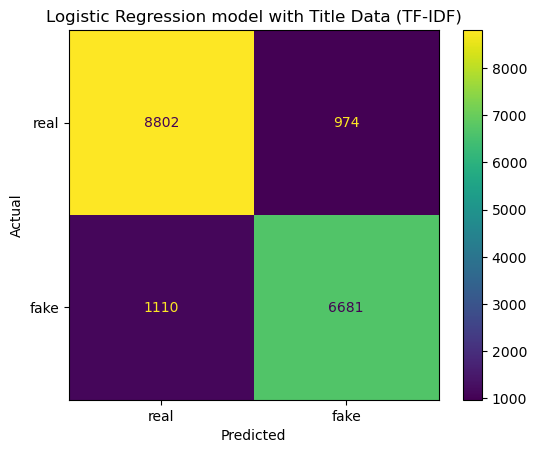

In [13]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Logistic Regression model with Title Data (TF-IDF)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [14]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [15]:
dict = {'data type': 'title',
        'model type':'logistic regression',
        'vectorize type':'TF-IDF',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [16]:
tfidf_title_lr=pd.DataFrame.from_dict([dict])

In [17]:
tfidf_title_lr

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,title,logistic regression,TF-IDF,0.881368,0.872763,0.857528,0.865078,0.546875


In [18]:
#save results for later use

%store tfidf_title_lr

Stored 'tfidf_title_lr' (DataFrame)
